In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.figsize']=(8,5.5)

In [2]:
youtube=pd.read_csv("C:/Users/neslihan.kumbasar/bootcamp/youtube.csv")
youtube.columns = ['sira', 'derece', 'kanal_adi', 'video_sayisi', 'abone_sayisi', 'goruntulenme_sayisi']

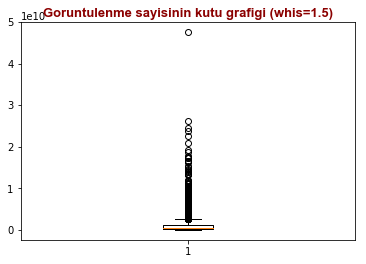

In [3]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.boxplot(youtube['goruntulenme_sayisi'])
plt.title("Goruntulenme sayisinin kutu grafigi (whis=1.5)", fontdict=baslik_font)
plt.show()

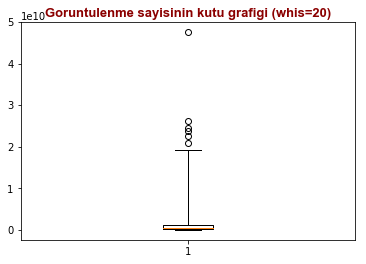

In [4]:
plt.boxplot(youtube['goruntulenme_sayisi'] , whis=20)
plt.title("Goruntulenme sayisinin kutu grafigi (whis=20)", fontdict=baslik_font)
plt.show()

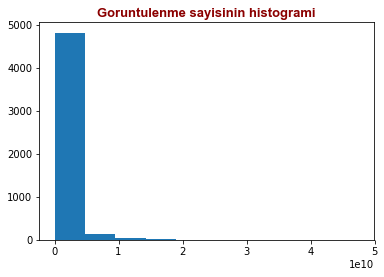

In [5]:
plt.hist(youtube['goruntulenme_sayisi'] )
plt.title("Goruntulenme sayisinin histogrami", fontdict=baslik_font)
plt.show()

In [6]:
from scipy.stats import zscore
z_scores=zscore(youtube['goruntulenme_sayisi'])
for threshold in range(1,5):
    print("Esik degeri : {}" .format(threshold))
    print("Aykiri degerlerin sayisi : {}". format(len(np.where (z_scores>threshold)[0])))
    print("----")
    

Esik degeri : 1
Aykiri degerlerin sayisi : 361
----
Esik degeri : 2
Aykiri degerlerin sayisi : 167
----
Esik degeri : 3
Aykiri degerlerin sayisi : 95
----
Esik degeri : 4
Aykiri degerlerin sayisi : 64
----


In [7]:
q75,q25= np.percentile(youtube['goruntulenme_sayisi'],[75,25])
caa=q75-q25
esik_degerleri=pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger=q25-(caa*esik_degeri)
    max_deger=q75+(caa*esik_degeri)
    aykiri_deger_sayisi=len((np.where((youtube['goruntulenme_sayisi']>max_deger)|(youtube['goruntulenme_sayisi']<min_deger))[0]))
    esik_degerleri=esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayisi': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri    

,esik_degeri,aykiri_deger_sayisi
0,1.0,624.0
1,1.5,475.0
2,2.0,371.0
3,2.5,296.0
4,3.0,242.0
5,3.5,209.0
6,4.0,182.0
7,4.5,151.0


In [8]:
from scipy.stats.mstats import winsorize
winsorize_goruntulenme=winsorize(youtube['goruntulenme_sayisi'], (0, 0.10))
winsorize_goruntulenme

masked_array(data=[2468241402, 2468241402, 2468241402, ...,  311758426,
                     14563764,   73312511],
             mask=False,
       fill_value=999999,
            dtype=int64)

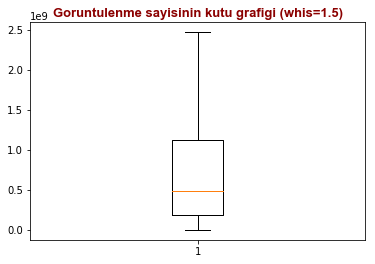

In [9]:
plt.boxplot(winsorize_goruntulenme)
plt.title("Goruntulenme sayisinin kutu grafigi (whis=1.5)", fontdict=baslik_font)
plt.show()

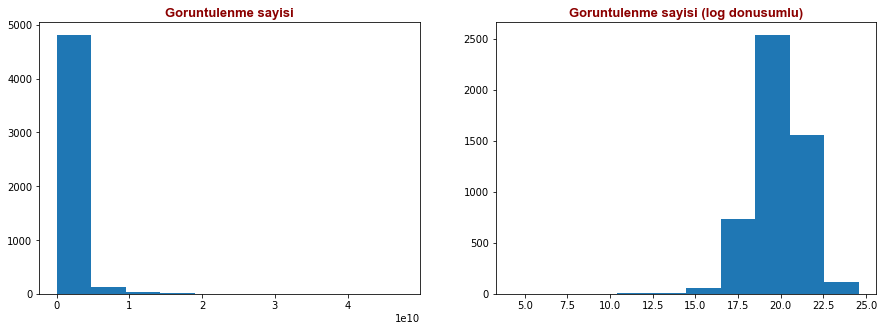

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(youtube['goruntulenme_sayisi'])
plt.title("Goruntulenme sayisi", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(np.log(youtube['goruntulenme_sayisi']))
plt.title("Goruntulenme sayisi (log donusumlu)", fontdict=baslik_font)

plt.show()

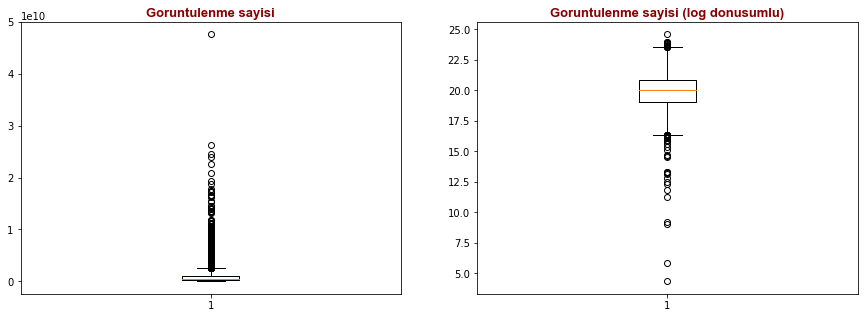

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(youtube['goruntulenme_sayisi'])
plt.title("Goruntulenme sayisi", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.boxplot(np.log(youtube['goruntulenme_sayisi']))
plt.title("Goruntulenme sayisi (log donusumlu)", fontdict=baslik_font)

plt.show()

In [12]:
q75_log,q25_log= np.percentile(np.log(youtube['goruntulenme_sayisi']),[75,25])
caa_log=q75_log-q25_log
esik_degerleri_log=pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi','aykiri_deger_sayisi_log'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger_log=q25_log-(caa_log*esik_degeri)
    max_deger_log=q75_log+(caa_log*esik_degeri)
    min_deger=q25-(caa*esik_degeri)
    max_deger=q75+(caa*esik_degeri)
    
    aykiri_deger_sayisi=len((np.where((youtube['goruntulenme_sayisi']>max_deger)|(youtube['goruntulenme_sayisi']<min_deger))[0]))
    
    aykiri_deger_sayisi_log=len((np.where((np.log(youtube["goruntulenme_sayisi"]) > max_deger_log)| 
                                          (np.log(youtube["goruntulenme_sayisi"]) < min_deger_log))[0]))
    
    esik_degerleri_log=esik_degerleri_log.append({'esik_degeri': esik_degeri,
                                          'aykiri_deger_sayisi': aykiri_deger_sayisi, 
                                          'aykiri_deger_sayisi_log': aykiri_deger_sayisi_log}, 
                                           ignore_index=True)
esik_degerleri_log

,esik_degeri,aykiri_deger_sayisi,aykiri_deger_sayisi_log
0,1.0,624.0,326.0
1,1.5,475.0,58.0
2,2.0,371.0,19.0
3,2.5,296.0,14.0
4,3.0,242.0,13.0
5,3.5,209.0,8.0
6,4.0,182.0,6.0
7,4.5,151.0,4.0


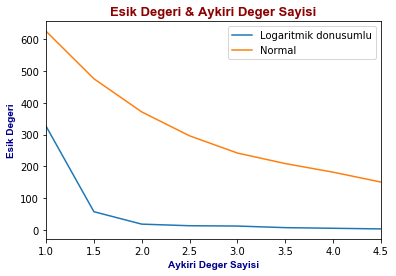

In [14]:
esik_degerleri_log.plot(x = 'esik_degeri', y=['aykiri_deger_sayisi_log', 'aykiri_deger_sayisi'])
plt.title('Esik Degeri & Aykiri Deger Sayisi', fontdict=baslik_font )
plt.ylabel('Esik Degeri', fontdict=eksen_font )
plt.xlabel('Aykiri Deger Sayisi', fontdict=eksen_font )
plt.legend(('Logaritmik donusumlu', 'Normal'))
plt.show()